# Breast Cancer Detection 



### Import ML packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from pandas.plotting import scatter_matrix
import seaborn as sns

%matplotlib inline

### Load and Read Dataset

In [4]:
# Load Dataset
df = pd.read_csv('D:\Project\Breast cancer prediction\data.csv')

In [6]:
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [8]:
#Shape of the Dataset
df.shape

(699, 11)

## Data pre-processing

In [9]:
df.drop(['id'],axis=1,inplace = True)

In [10]:
# Columns in the dataset
df.columns

Index(['clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

## Handling missing values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   clump_thickness    699 non-null    int64 
 1   size_uniformity    699 non-null    int64 
 2   shape_uniformity   699 non-null    int64 
 3   marginal_adhesion  699 non-null    int64 
 4   epithelial_size    699 non-null    int64 
 5   bare_nucleoli      699 non-null    object
 6   bland_chromatin    699 non-null    int64 
 7   normal_nucleoli    699 non-null    int64 
 8   mitoses            699 non-null    int64 
 9   class              699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [12]:
#Diagnosis class Malignant = 4 and Benign = 2
#The number of Benign and Maglinant cases from the dataset
df['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [14]:
df['bare_nucleoli'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nucleoli, dtype: int64

In [16]:
df[df['bare_nucleoli'] == '?']

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,8,4,5,1,2,?,7,3,1,4
40,6,6,6,9,6,?,7,8,1,2
139,1,1,1,1,1,?,2,1,1,2
145,1,1,3,1,2,?,2,1,1,2
158,1,1,2,1,3,?,1,1,1,2
164,5,1,1,1,2,?,3,1,1,2
235,3,1,4,1,2,?,3,1,1,2
249,3,1,1,1,2,?,3,1,1,2
275,3,1,3,1,2,?,2,1,1,2
292,8,8,8,1,2,?,6,10,1,4


In [17]:
df[df['bare_nucleoli'] == '?'].sum()

clump_thickness                    54
size_uniformity                    39
shape_uniformity                   46
marginal_adhesion                  29
epithelial_size                    39
bare_nucleoli        ????????????????
bland_chromatin                    50
normal_nucleoli                    44
mitoses                            16
class                              36
dtype: object

In [18]:
df.replace('?',np.nan,inplace=True)

In [19]:
df['bare_nucleoli'][23]

nan

In [20]:
df.isna().sum()

clump_thickness       0
size_uniformity       0
shape_uniformity      0
marginal_adhesion     0
epithelial_size       0
bare_nucleoli        16
bland_chromatin       0
normal_nucleoli       0
mitoses               0
class                 0
dtype: int64

In [21]:
df.fillna(method='ffill', inplace=True)

In [22]:
df.isna().sum()

clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

In [23]:
df['bare_nucleoli'] = df['bare_nucleoli'].astype('int64')

## Exploratory Data Analysis

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   clump_thickness    699 non-null    int64
 1   size_uniformity    699 non-null    int64
 2   shape_uniformity   699 non-null    int64
 3   marginal_adhesion  699 non-null    int64
 4   epithelial_size    699 non-null    int64
 5   bare_nucleoli      699 non-null    int64
 6   bland_chromatin    699 non-null    int64
 7   normal_nucleoli    699 non-null    int64
 8   mitoses            699 non-null    int64
 9   class              699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


In [25]:
df.describe()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.529328,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.635260,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


## Bivariate Data Analysis

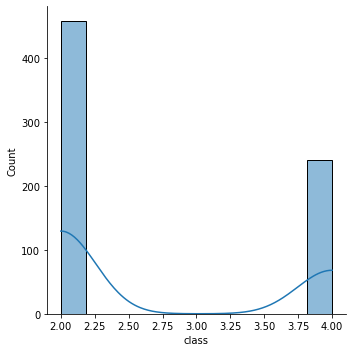

In [28]:
sns.displot(df['class'],kde=True)

## Multivariate Data Analysis

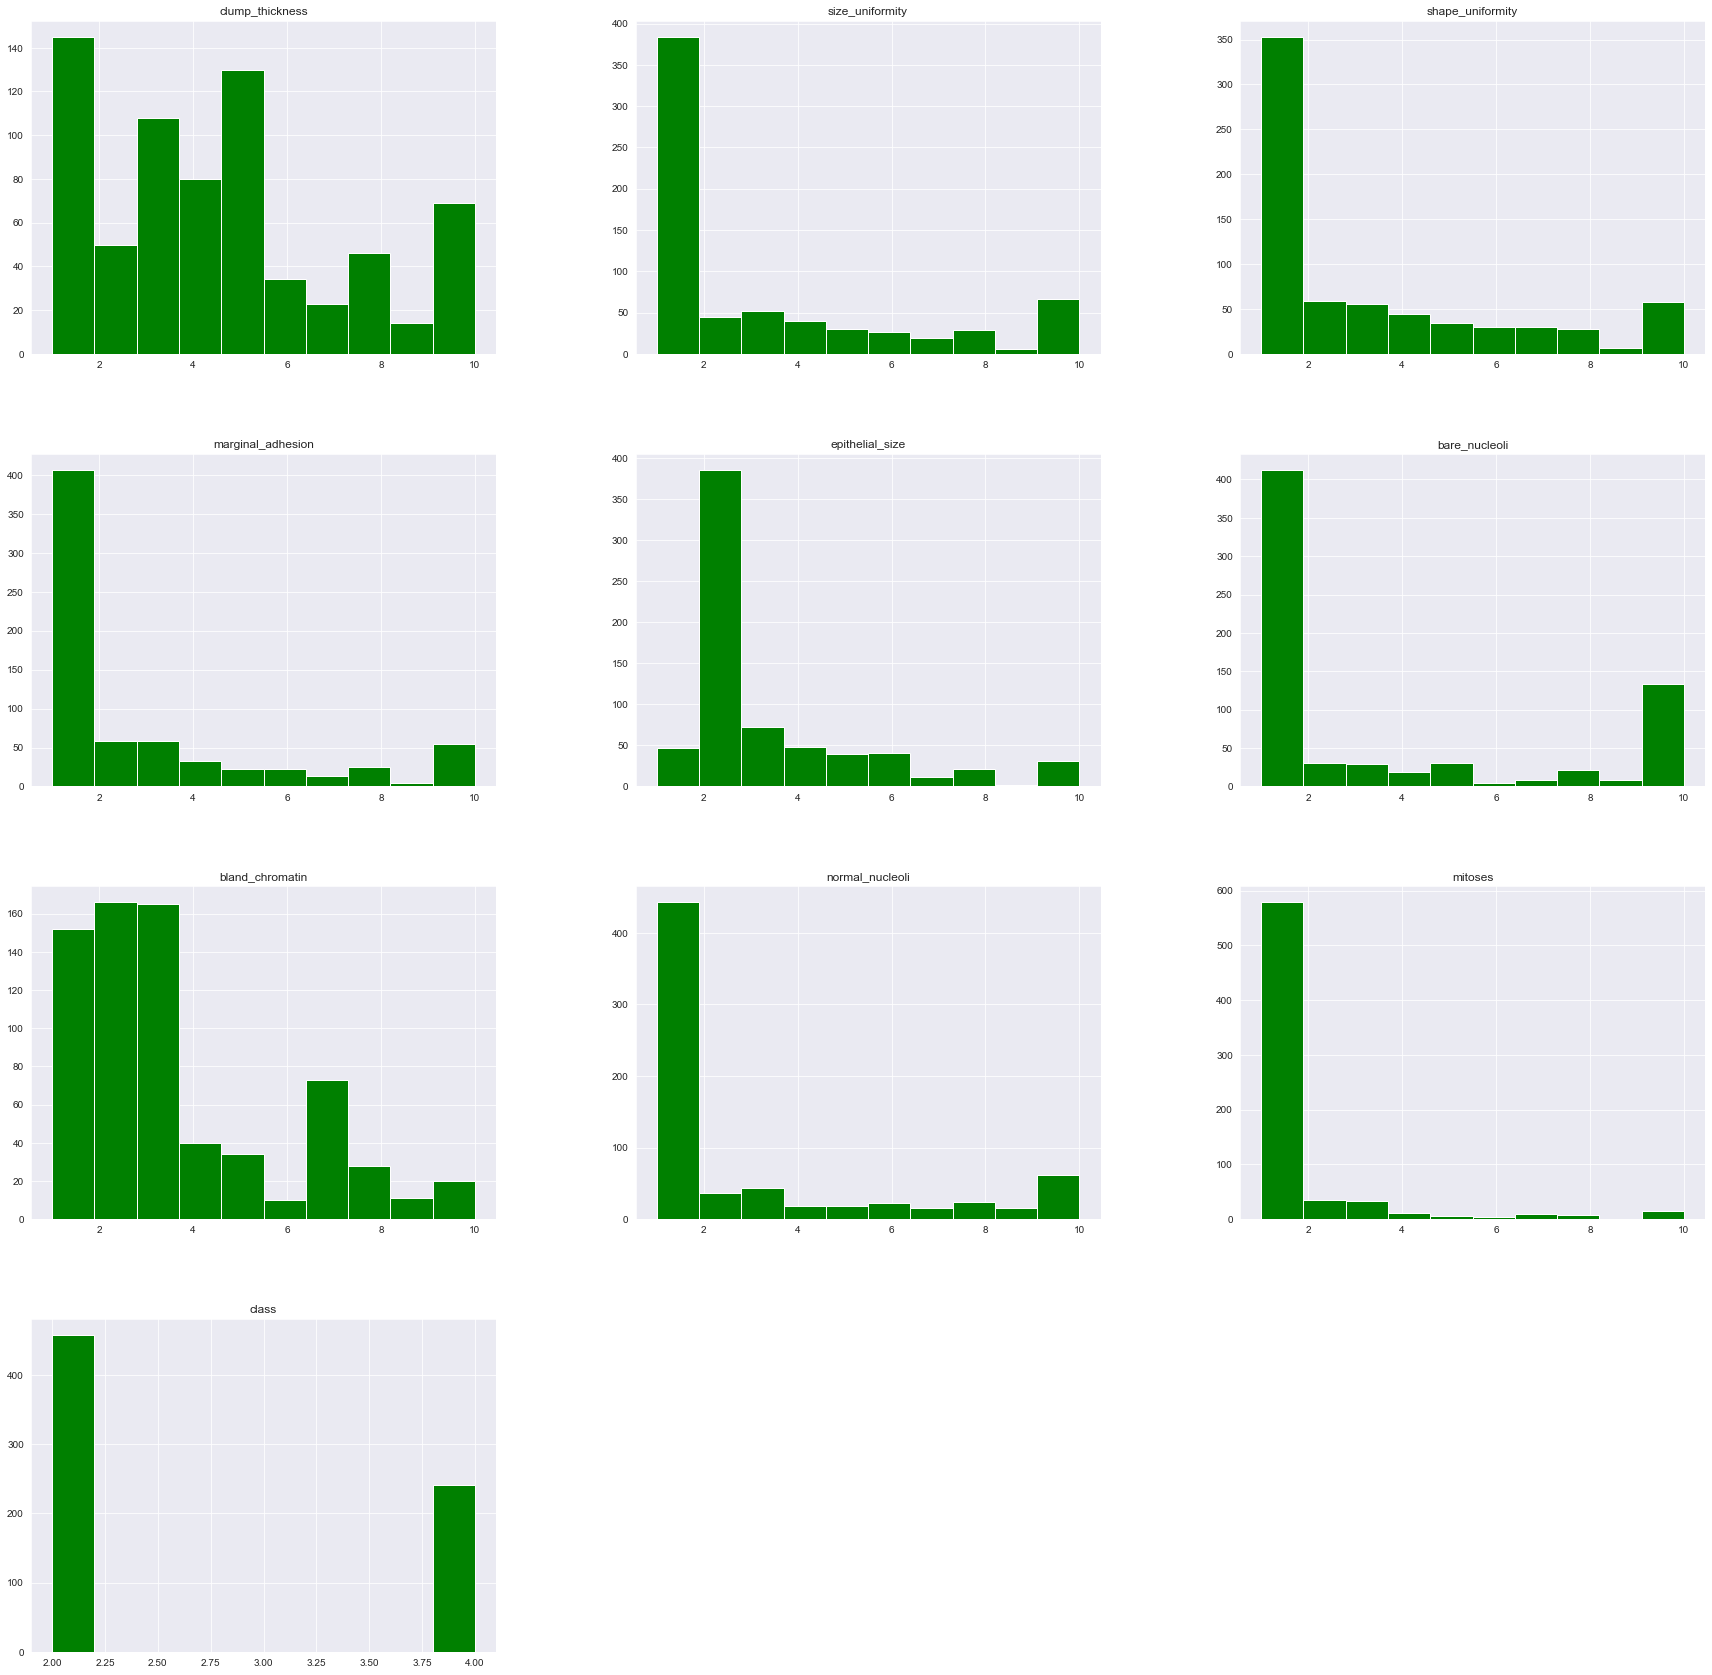

In [32]:
# Plot histograms for each variable
sns.set_style('darkgrid')
df.hist(figsize=(30,30), color="Green")
plt.show()

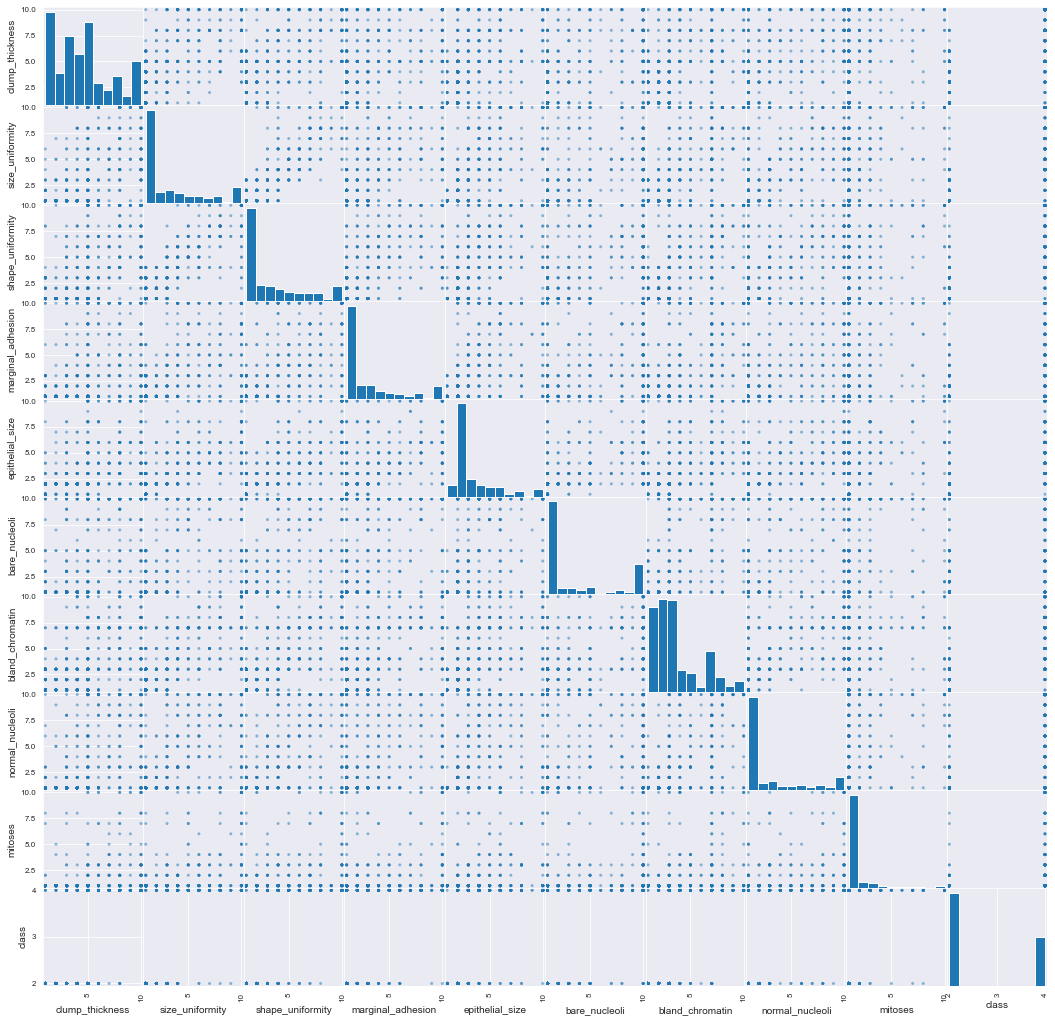

In [33]:
# Create scatter plot matrix
scatter_matrix(df, figsize = (18,18))
plt.show()

<AxesSubplot:>

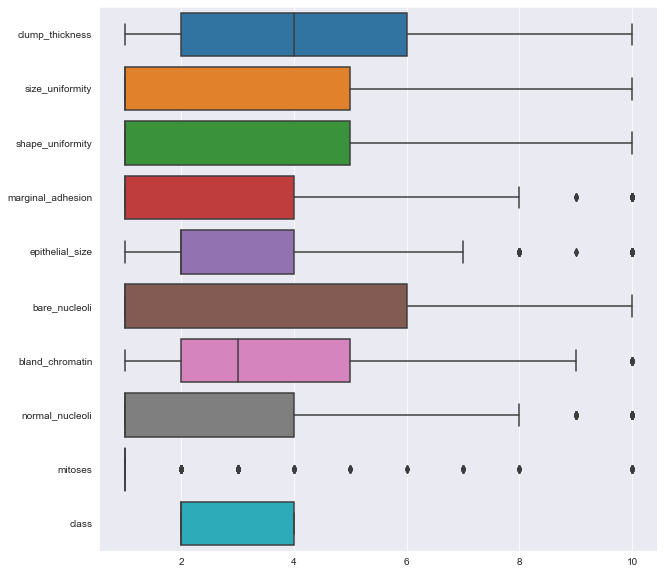

In [34]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,orient='h')

## Feature selection

In [35]:
df.corr()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.583571,0.558428,0.535835,0.350034,0.716001
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.681309,0.755721,0.722865,0.458693,0.817904
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.701137,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.663669,0.666715,0.603352,0.417633,0.696800
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.579340,0.616102,0.628881,0.479101,0.682785
bare_nucleoli,0.583571,0.681309,0.701137,0.663669,0.579340,1.000000,0.671398,0.571895,0.337078,0.807394
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.671398,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.571895,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.337078,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.807394,0.756616,0.712244,0.423170,1.000000


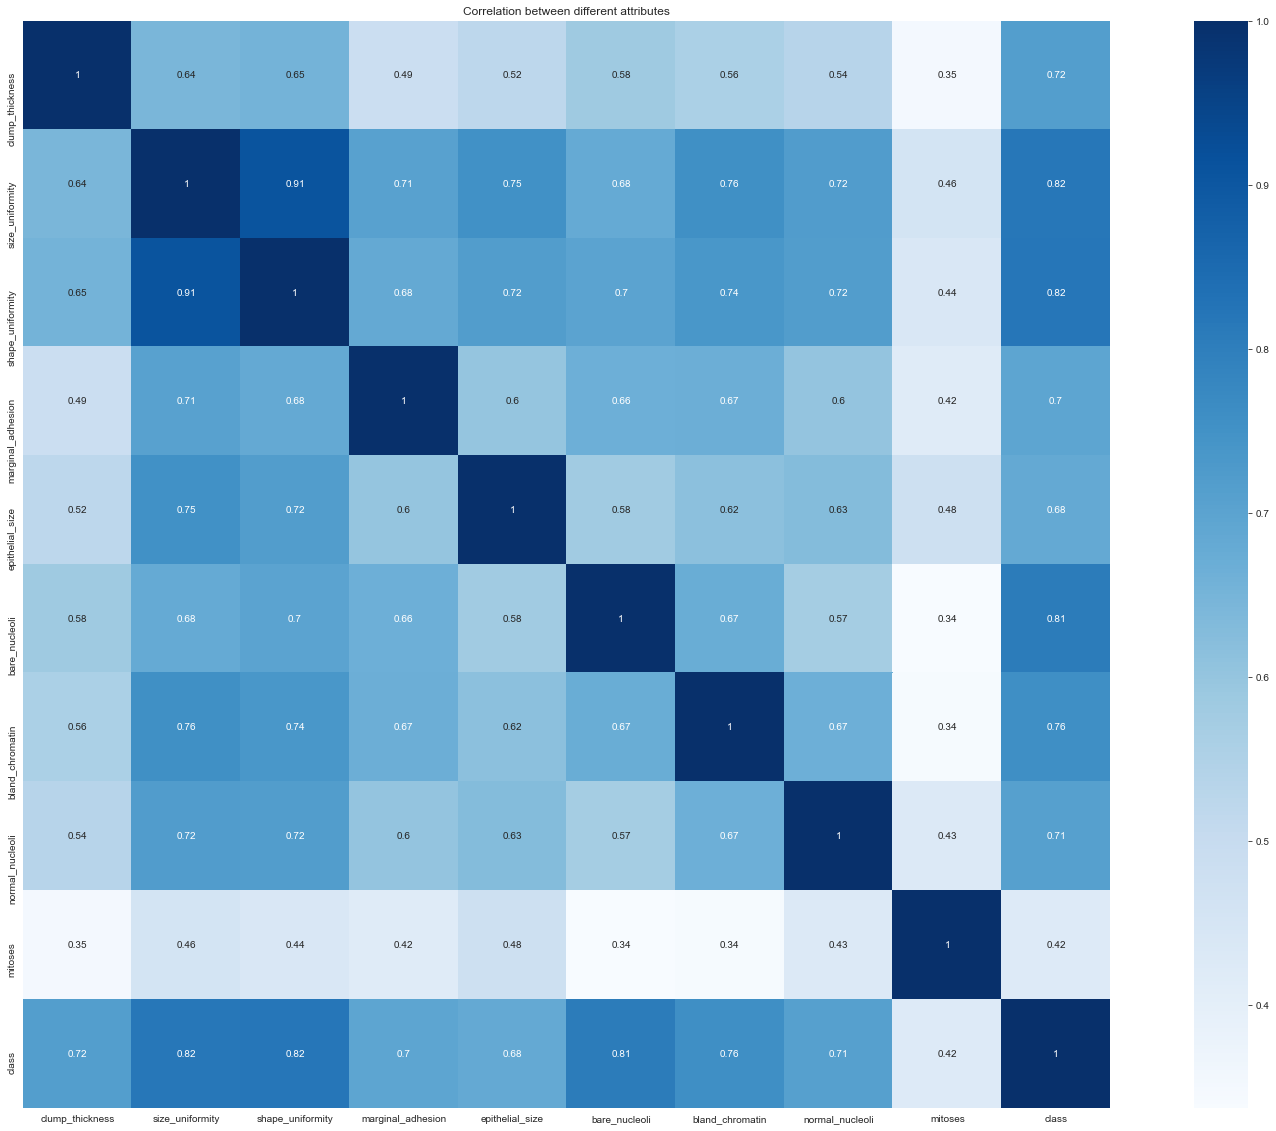

In [36]:
plt.figure(figsize=(30,20))
cor = df.corr()
sns.heatmap(cor,vmax=1,square = True,annot=True, cmap=plt.cm.Blues)
plt.title('Correlation between different attributes')
plt.show()

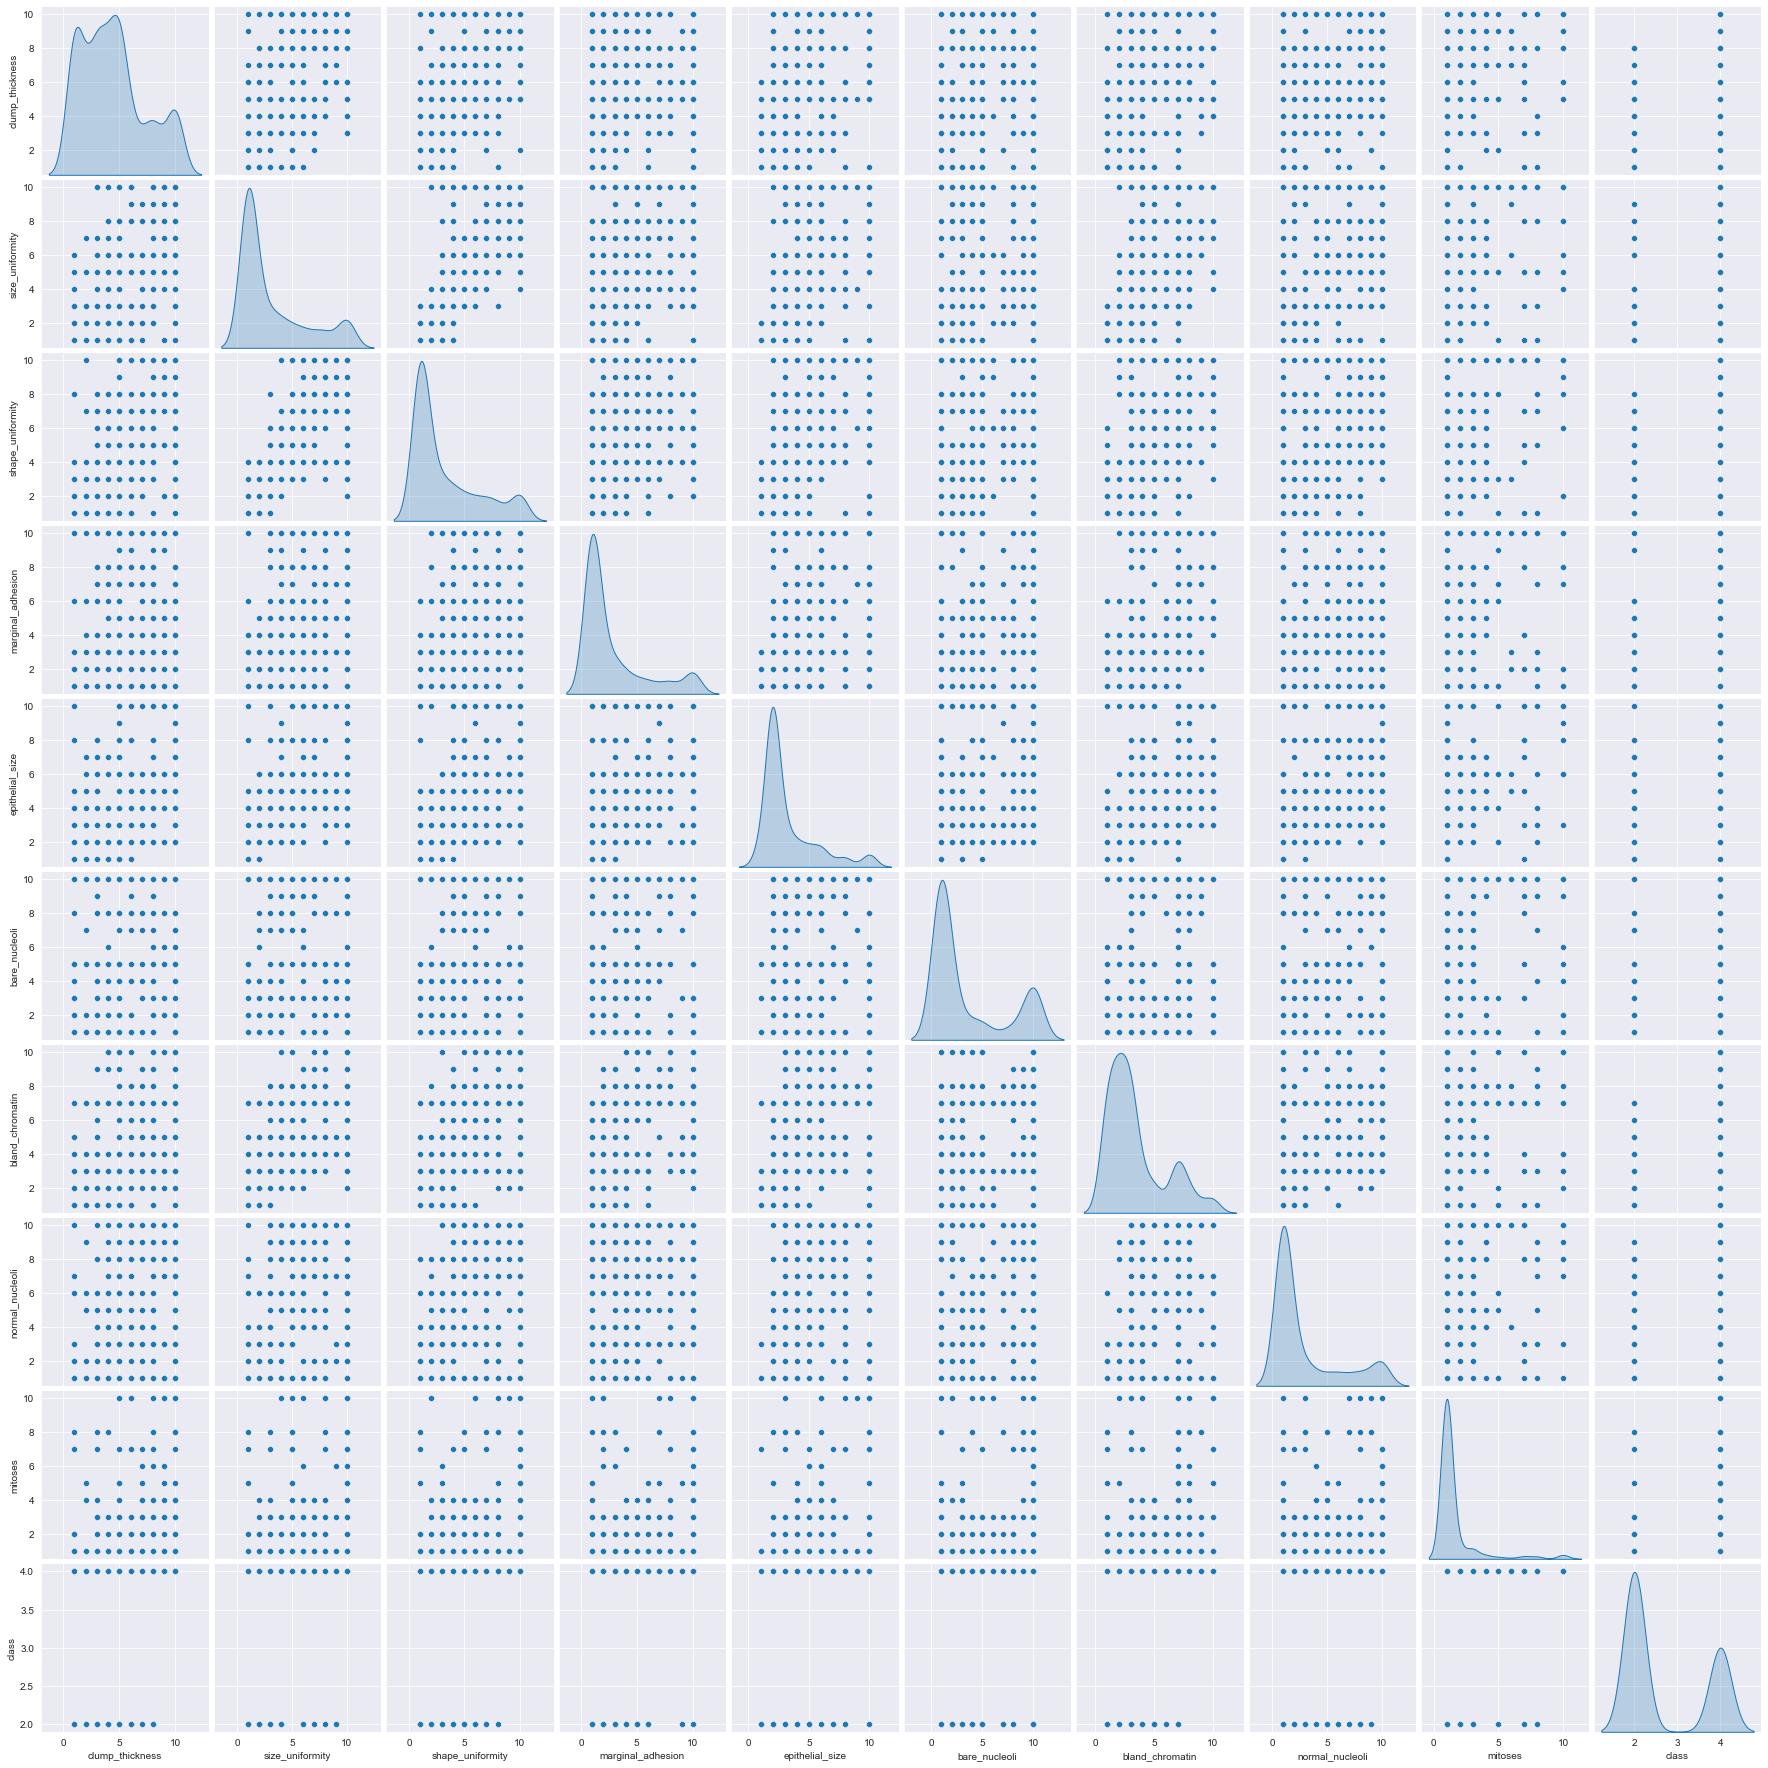

In [37]:
sns.pairplot(df,diag_kind='kde')

In [38]:
#Correlation with output variable
cor_target = abs(cor["class"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
relevant_features

clump_thickness      0.716001
size_uniformity      0.817904
shape_uniformity     0.818934
marginal_adhesion    0.696800
epithelial_size      0.682785
bare_nucleoli        0.807394
bland_chromatin      0.756616
normal_nucleoli      0.712244
mitoses              0.423170
class                1.000000
Name: class, dtype: float64

## Train and Test Model

In [39]:
#Split the data into predictor variables and target variable, following by breaking them into train and test sets. 

Y = df['class'].values
X = df.drop('class', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.3, random_state=1)

## Model Selection
### Baseline algorithm checking

* Analyse and build a model to predict if a given set of symptoms lead to breast cancer. This is a binary classification problem, and a few algorithms are appropriate for use. 

* As we do not know which one will perform the best at the point, we will do a quick test on the few appropriate algorithms with default setting to get an early indication of how each of them perform. 

* We will use 10 fold cross validation for each testing.

* The following non-linear algorithms will be used, namely: 
  * Classification and Regression Trees (CART) 
  * Linear Support Vector Machines (SVM)
  * Gaussian Naive Bayes (NB) 
  * k-Nearest Neighbors (KNN).

In [40]:
# Testing Options
scoring = 'accuracy'

In [41]:
# Define models to train
models= []
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC())) 
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "For %s Model:Mean accuracy is %f (Std accuracy is %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

For CART Model:Mean accuracy is 0.922279 (Std accuracy is 0.037431)
For SVM Model:Mean accuracy is 0.959099 (Std accuracy is 0.031617)
For NB Model:Mean accuracy is 0.959056 (Std accuracy is 0.022475)
For KNN Model:Mean accuracy is 0.959099 (Std accuracy is 0.040817)


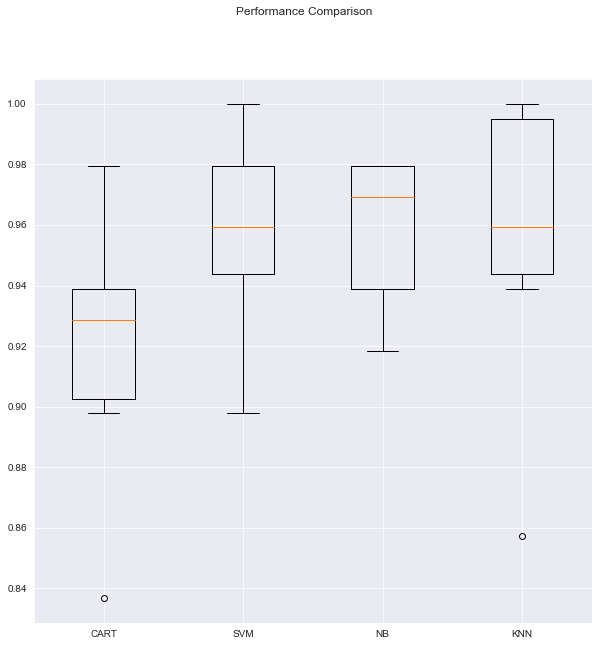

In [42]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

CART, SVM, GaussianNB and KNN  performed the best with  above 95% mean accuracy

In [43]:
# Make predictions on validation dataset

for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print("\nModel:",name)
    print("Accuracy score:",accuracy_score(Y_test, predictions))
    print("Classification report:\n",classification_report(Y_test, predictions))
    
# Accuracy - ratio of correctly predicted observation to the total observations. 
# Precision - (false positives) ratio of correctly predicted positive observations to the total predicted positive observations
# Recall (Sensitivity) - (false negatives) ratio of correctly predicted positive observations to the all observations in actual class - yes.
# F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false 


Model: CART
Accuracy score: 0.9285714285714286
Classification report:
               precision    recall  f1-score   support

           2       0.93      0.96      0.95       137
           4       0.93      0.86      0.89        73

    accuracy                           0.93       210
   macro avg       0.93      0.91      0.92       210
weighted avg       0.93      0.93      0.93       210


Model: SVM
Accuracy score: 0.9761904761904762
Classification report:
               precision    recall  f1-score   support

           2       0.98      0.99      0.98       137
           4       0.97      0.96      0.97        73

    accuracy                           0.98       210
   macro avg       0.98      0.97      0.97       210
weighted avg       0.98      0.98      0.98       210


Model: NB
Accuracy score: 0.9619047619047619
Classification report:
               precision    recall  f1-score   support

           2       0.98      0.96      0.97       137
           4       0.93 

## Support Vector Machine

In [44]:
clf = SVC()

clf.fit(X_train, Y_train)
accuracy = clf.score(X_test, Y_test)
print("Test Accuracy:",accuracy)

predict = clf.predict(X_test)
predict

Test Accuracy: 0.9761904761904762


array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2], dtype=int64)

In [45]:
example_measures = [[4,2,1,1,1,2,3,2,1]]
prediction = clf.predict(example_measures)
print(prediction)

[2]


In [46]:
import itertools
sns.set_theme(style="dark")
def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       0.98      0.99      0.98       137
           4       0.97      0.96      0.97        73

    accuracy                           0.98       210
   macro avg       0.98      0.97      0.97       210
weighted avg       0.98      0.98      0.98       210

Confusion matrix, without normalization
[[135   2]
 [  3  70]]


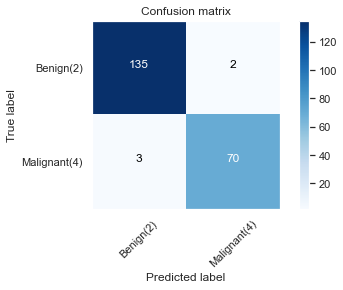

In [47]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, predict, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(Y_test, predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [48]:
import pickle
pickle.dump(clf, open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))
print(model.predict([[4,2,1,1,1,2,3,2,1]]))

[2]
